In [196]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

In [197]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

## データの基本統計量を見てみる

In [198]:
train.describe(include='all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Quick, Miss. Phyllis May",male,NaN,NaN,NaN,CA. 2343,NaN,C23 C25 C27,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


## データの型を見てみる

In [199]:
print (train.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB
None


# 欠測値の確認

全データ数が891に対しての欠測値の数が、以下のようになっている。 
Ageが177でおよそ20%の欠測  
Cabinが687でおよそ77%の欠測  
Embarkedが2の欠測であった。  

Cabinは欠測率が高い　　＝＞削除した方がいいかも  
Ageは欠測率が小さい=>補完する  
Embarkedは欠測値が少ないので、補完する  

In [200]:
print("cout=", 891)
pd.isnull(train).sum()

cout= 891


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [201]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

# データの種類

1. Survived:カテゴリデータ
2. Pclass:カテゴリデータ
3. Name:カテゴリデータ
4. Age:数値データ
5. SibSp:カテゴリデータ
6. Parch:カテゴリデータ
7. Ticket:カテゴリデータ
8. Fare:数値データ
9. Cabin:カテゴリデータ
10. Embarked:カテゴリデータ

In [202]:
p_id = train["PassengerId"]
train = train.drop(["PassengerId"], axis=1)

## Survived

生存フラグ  
0:死亡  
1:生存  

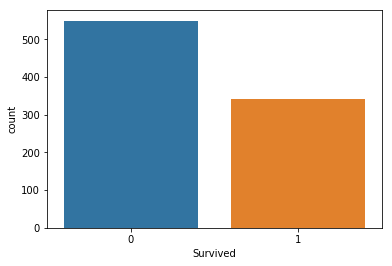

In [203]:
sns.countplot(x="Survived", data=train)

## Pclass

Ticket Class  
1:1st  
2:2nd  
3:3rd

unique_val: [3 1 2]
unique_val_counts
Number of Name unique: 3
3    491
1    216
2    184
Name: Pclass, dtype: int64


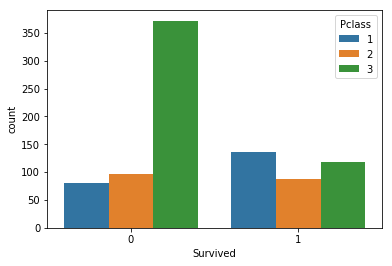

In [204]:
print('unique_val:', train['Pclass'].unique())
print('unique_val_counts')
print('Number of Name unique:', train['Pclass'].nunique())
print(train['Pclass'].value_counts())
sns.countplot(x="Survived", hue='Pclass', data=train)

In [205]:
print (train[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean())

   Pclass  Survived
0       1  0.629630
1       2  0.472826
2       3  0.242363


## Name

固有名称が891と分類が難しい

In [206]:
print('Number of Name unique:', train['Name'].nunique())
print(train['Name'].value_counts())

Number of Name unique: 891
Quick, Miss. Phyllis May                           1
Jardin, Mr. Jose Neto                              1
Sage, Mr. Frederick                                1
Ryan, Mr. Patrick                                  1
Renouf, Mr. Peter Henry                            1
Flynn, Mr. John                                    1
Cor, Mr. Liudevit                                  1
Calic, Mr. Jovo                                    1
Ohman, Miss. Velin                                 1
Walker, Mr. William Anderson                       1
de Mulder, Mr. Theodore                            1
Goodwin, Master. Sidney Leonard                    1
Allison, Mrs. Hudson J C (Bessie Waldo Daniels)    1
Olsson, Mr. Nils Johan Goransson                   1
Pasic, Mr. Jakob                                   1
Frauenthal, Dr. Henry William                      1
Boulos, Mr. Hanna                                  1
Collyer, Miss. Marjorie "Lottie"                   1
Coleff, Mr. Satio  

## Sex

female or male

unique_val: ['male' 'female']
Number of Name unique: 2
unique_val_counts
male      577
female    314
Name: Sex, dtype: int64


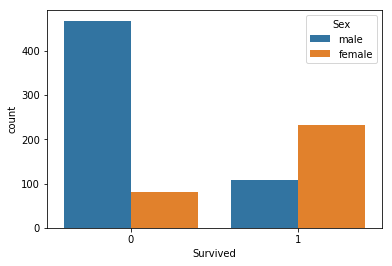

In [207]:
print('unique_val:', train['Sex'].unique())
print('Number of Name unique:', train['Sex'].nunique())
print('unique_val_counts')
print(train['Sex'].value_counts())

#0 is dead, 1is survival
sns.countplot(x="Survived", hue="Sex",data=train)

In [208]:
print (train[["Sex", "Survived"]].groupby(['Sex'], as_index=False).mean())

      Sex  Survived
0  female  0.742038
1    male  0.188908


### 数値化する

In [209]:
train['Sex'] = train['Sex'].map({'male':0, 'female':1})

## Age

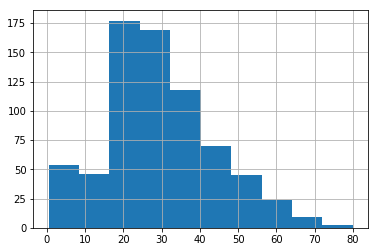

In [210]:
train['Age'].hist()

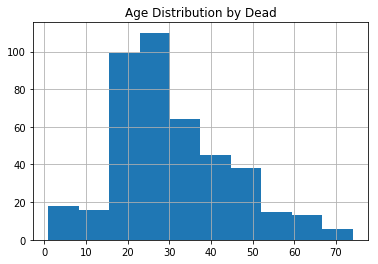

In [211]:
plt.title('Age Distribution by Dead')
train[train['Survived'] == 0]['Age'].hist()

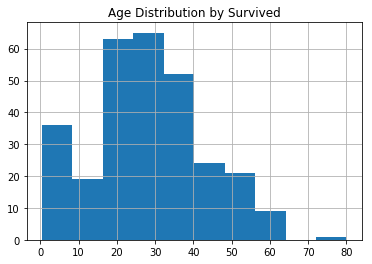

In [212]:
plt.title('Age Distribution by Survived')
train[train['Survived'] == 1]['Age'].hist()

## SibSp

兄弟・配偶者の人数

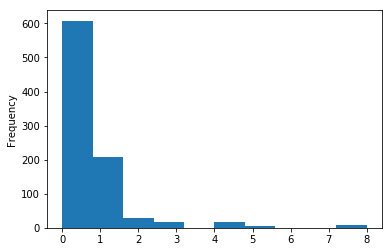

In [213]:
train["SibSp"].plot("hist")

unique_val: [1 0 3 4 2 5 8]
unique_val_counts
Number of Name unique: 7
0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64


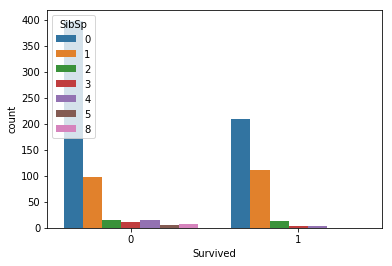

In [214]:
print('unique_val:', train['SibSp'].unique())
print('unique_val_counts')
print('Number of Name unique:', train['SibSp'].nunique())
print(train['SibSp'].value_counts())
sns.countplot(x="Survived", hue='SibSp', data=train)

## Parch

親・子供の人数

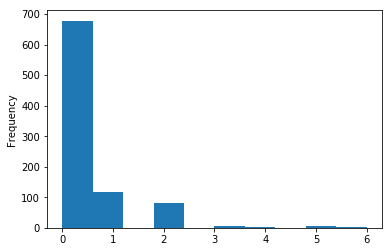

In [215]:
train["Parch"].plot('hist')

unique_val: [0 1 2 5 3 4 6]
unique_val_counts
Number of Name unique: 7
0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64


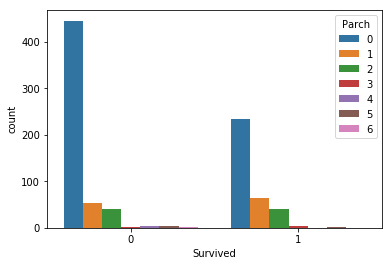

In [216]:
print('unique_val:', train['Parch'].unique())
print('unique_val_counts')
print('Number of Name unique:', train['Parch'].nunique())
print(train['Parch'].value_counts())
sns.countplot(x="Survived", hue='Parch', data=train)

## Ticket

Ticketの番号  

固有名称が、681と多い

In [217]:
#print('unique_val:', train['Ticket'].unique())
print('unique_val_counts')
print('Number of Name unique:', train['Ticket'].nunique())
print(train['Ticket'].value_counts());
#sns.countplot(x="Survived", hue='Ticket', data=train)

unique_val_counts
Number of Name unique: 681
CA. 2343              7
347082                7
1601                  7
3101295               6
347088                6
CA 2144               6
S.O.C. 14879          5
382652                5
4133                  4
LINE                  4
2666                  4
347077                4
113781                4
349909                4
W./C. 6608            4
17421                 4
113760                4
19950                 4
PC 17757              4
13502                 3
C.A. 31921            3
PC 17582              3
345773                3
PC 17760              3
363291                3
248727                3
29106                 3
PC 17572              3
371110                3
230080                3
                     ..
367229                1
W./C. 14258           1
SC/AH 29037           1
28213                 1
367655                1
386525                1
SOTON/O.Q. 3101306    1
2683                  1
2620               

In [218]:
print(train[train['Ticket'] == 'CA. 2343']['Survived'].value_counts())
print(train[train['Ticket'] == '1601']['Survived'].value_counts())
print(train[train['Ticket'] == '347082']['Survived'].value_counts())
print(train[train['Ticket'] == 'CA 2144']['Survived'].value_counts())

0    7
Name: Survived, dtype: int64
1    5
0    2
Name: Survived, dtype: int64
0    7
Name: Survived, dtype: int64
0    6
Name: Survived, dtype: int64


## Fare

料金

unique_val_counts
Number of Name unique: 248
8.0500     43
13.0000    42
7.8958     38
7.7500     34
26.0000    31
Name: Fare, dtype: int64


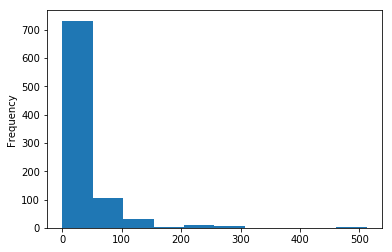

In [219]:
#print('unique_val:', train['Fare'].unique())
print('unique_val_counts')
print('Number of Name unique:', train['Fare'].nunique())
print(train['Fare'].value_counts().head())
train['Fare'].plot('hist')
plt.show()
#sns.countplot(x='Survived', hue='Fare', data=train)

## Cabin

Cabin number

In [220]:
#print('unique_val:', train['Cabin'].unique())
print('unique_val_counts')
print('Number of Name unique:', train['Cabin'].nunique())
print(train['Cabin'].value_counts().head(3))
#sns.countplot(x="Survived", hue='Cabin', data=train)

unique_val_counts
Number of Name unique: 147
C23 C25 C27    4
G6             4
B96 B98        4
Name: Cabin, dtype: int64


## Embarked 

出発した港  
C = Cherbourg  
Q = Queenstown  
S = Southampton  　

unique_val: ['S' 'C' 'Q' nan]
unique_val_counts
Number of Name unique: 3
S    644
C    168
Q     77
Name: Embarked, dtype: int64


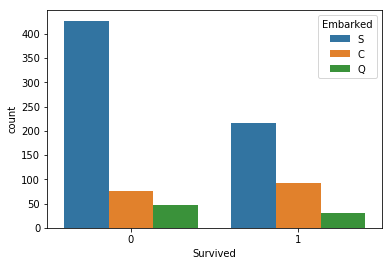

In [221]:
print('unique_val:', train['Embarked'].unique())
print('unique_val_counts')
print('Number of Name unique:', train['Embarked'].nunique())
print(train['Embarked'].value_counts().head(3))
sns.countplot(x="Survived", hue='Embarked', data=train)

## Pclass and Sex

Text(0.5,1,'Pclass=1 and Sex = female')

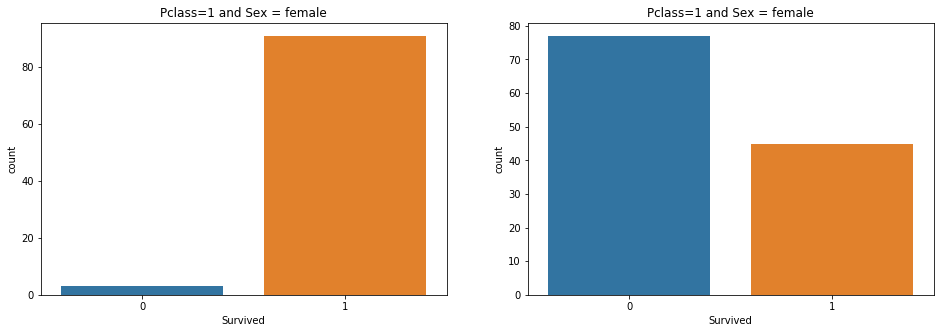

In [222]:
pclass_1 = train[train['Pclass'] == 1]
p1_f = pclass_1[pclass_1['Sex'] == 1]
p1_m = pclass_1[pclass_1['Sex'] == 0]

fig, ax = plt.subplots(figsize=(16, 5))
plt.subplot(1, 2, 1)
g = sns.countplot(x='Survived', data=p1_f)
plt.title('Pclass=1 and Sex = female')
plt.subplot(1, 2, 2)
g = sns.countplot(x='Survived', data=p1_m)
plt.title('Pclass=1 and Sex = female')

Text(0.5,1,'Pclass=2 and Sex = female')

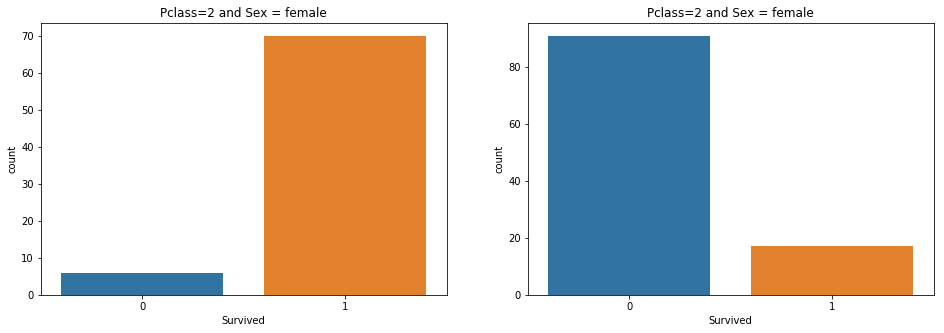

In [223]:
pclass_2 = train[train['Pclass'] == 2]
p2_f = pclass_2[pclass_2['Sex'] == 1]
p2_m = pclass_2[pclass_2['Sex'] == 0]

fig, ax = plt.subplots(figsize=(16, 5))
plt.subplot(1, 2, 1)
g = sns.countplot(x='Survived', data=p2_f)
plt.title('Pclass=2 and Sex = female')
plt.subplot(1, 2, 2)
g = sns.countplot(x='Survived', data=p2_m)
plt.title('Pclass=2 and Sex = female')

Text(0.5,1,'Pclass=3 and Sex = male')

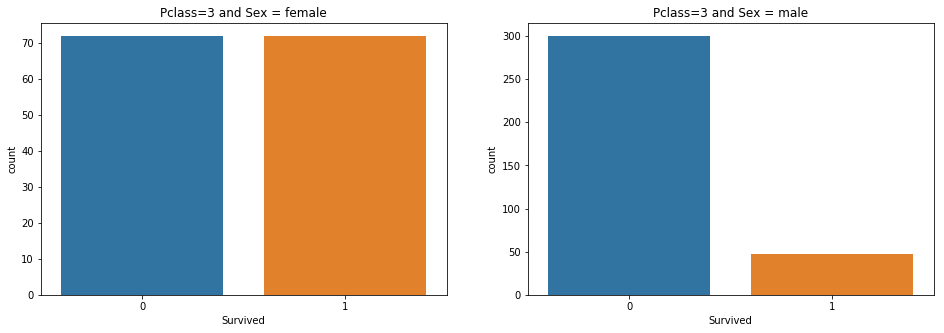

In [224]:
pclass_3 = train[train['Pclass'] == 3]
p3_f = pclass_3[pclass_3['Sex'] == 1]
p3_m = pclass_3[pclass_3['Sex'] == 0]

fig, ax = plt.subplots(figsize=(16, 5))
plt.subplot(1, 2, 1)
g = sns.countplot(x='Survived', data=p3_f)
plt.title('Pclass=3 and Sex = female')
plt.subplot(1, 2, 2)
g = sns.countplot(x='Survived', data=p3_m)
plt.title('Pclass=3 and Sex = male')

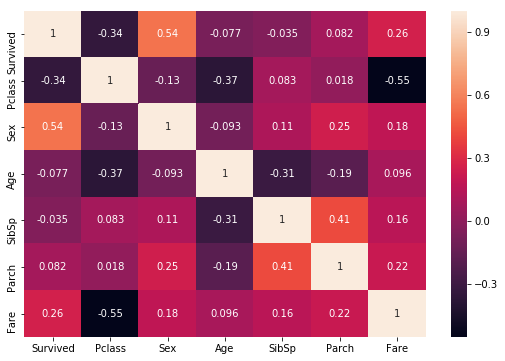

In [225]:
fig, axes = plt.subplots(figsize=(9, 6))
sns.heatmap(train.corr(),annot=True)

# 方針
1. カテゴリ変数はエンコーディング(数値化)しよう
2. 欠測値の多い'Age'と'Cabin'は削除しよう
3. Embarkedは欠測が２個なので、補完しよう
4.  'Name'と'Ticket'は、文字データなので扱いづらいので、削除しよう

## 欠測値 Embarkedの補完

a = train['Embarked'].fillna('S')  
b = train.drop(['Embarked'], axis=1)  
train = pd.concat([b,a], axis=1)  
train.isnull().sum()  

In [226]:
train['Embarked'] = train['Embarked'].fillna('S')

In [227]:
train.isnull().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      0
dtype: int64

## Embarkedのエンコーディング
ダミー変換をする

In [228]:
train['Embarked'] = train['Embarked'].map({'S':0, 'C':1, 'Q':2})

## データの削除

In [229]:
drop_col = ['Survived', 'Name', 'Ticket', 'Cabin', 'Age']
y = train['Survived']
X = train.drop(drop_col, axis=1)

## テストデータも整形する

In [230]:
p_id = test['PassengerId']
drop_col_test = ['PassengerId', 'Name', 'Ticket', 'Cabin', 'Age']
test['Embarked'] = test['Embarked'].fillna('S')
test['Embarked'] = test['Embarked'].map({'S':0, 'C':1, 'Q':2})

In [232]:
test['Fare'] = test['Fare'].fillna(test['Fare'].median())
test['Sex'] = test['Sex'].map({'male':0, 'female':1})
test = test.drop(drop_col_test, axis=1)

In [233]:
test.isnull().sum()

Pclass      0
Sex         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

# モデル作成

##trainデータを更に、学習用と検証用に分ける

In [234]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=1)

## ロジスティック回帰

In [235]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_val)
acc_logreg = round(accuracy_score(y_pred, y_val) * 100, 2)
print(acc_logreg)

78.21


/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


## ランダムフォレスト

In [236]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier

randomforest = RandomForestClassifier()
randomforest.fit(X_train, y_train)
y_pred = randomforest.predict(X_val)
acc_randomforest = round(accuracy_score(y_pred, y_val) * 100, 2)
print(acc_randomforest)

78.21


/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


# 予測して、提出ファイルを作成

In [237]:
pred = randomforest.predict(test)

In [243]:
submit = pd.DataFrame({'PassengerId':p_id, 'Survived':pred})

In [245]:
submit.to_csv('submit_randomforest.csv', index=None)